# Udacity Data Science Nanodegree
## Assignment 1

### CRISP-DM Process:

#### Business Understanding
I chose the Seattle AirBnB dataset as I live in Seattle and it seemed like a good place to start. There are a lot of headlines about the impact of AirBNB on the housing and rental market in the United States. As someone who also works in equitable housing, I wanted to dig into some of the data to see if there are any interesting correlations between the AirBNB hosts who have many listings in an area, and whether the ratings of the listings are positive or negative.

The questions are regarding the the relationship between hosts and their ratings such as:
- Do hosts with more listings correlate to lower overall review scores?
- Do the number of ratings demonstrate positive or negative experiences?  (i.e. do properties with the most ratings trend favorably or negatively)
- Do strict cancellation policies correlate to increased negative reviews?

In [2]:
# Import Modules

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline


#### Data Understanding

In [107]:
# This is an analysis of data from Airbnb in the Seattle Region.
# # listings.csv contains all of the Airbnb listings in the Seattle region.
# We will import the file as a dataframe. From there, we will analyze the data and create visualizations 
# to help us understand the data
listings_df = pd.read_csv('listings.csv')
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


#### Prepare Data

# Question 1: 
### Do hosts with more listings correlate to lower overall review scores?

In [63]:
multi_host_df = listings_df[['host_id', 'host_total_listings_count', 'review_scores_rating']].groupby('host_id').count().sort_values(by='review_scores_rating', ascending=False)
multi_host_df.head()

,host_total_listings_count,review_scores_rating
host_id,,
8534462,46,41
4962900,39,37
3074414,34,34
74305,33,31
430709,36,29


#### Data Modeling


<AxesSubplot:title={'center':'Hosts with More Listings vs Lower Review Scores'}, xlabel='host_total_listings_count', ylabel='review_scores_rating'>

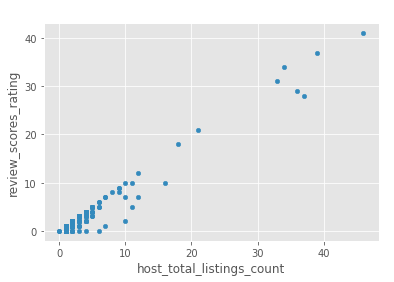

In [33]:
# Plotting the data
multi_host_df.plot(kind = 'scatter', x = 'host_total_listings_count', y = 'review_scores_rating', title = 'Hosts with More Listings vs Lower Review Scores')

When looking at the graph, we can see that there is a negative correlation between the amount of listings a host has, and the review score they receive.

In [39]:
# Using linear regression to see what the correlation between the two is
X = multi_host_df[['host_total_listings_count']]
y = multi_host_df['review_scores_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_predict = lr_model.predict(X_test)
# Printing the r-squared score, which determines how well the model fits the data.
# R-squared ranges from 0 to 1, so we want to see a high number here
print(f"Model Score: {lr_model.score(X_test, y_test)}.")
print(f"Mean squared error: {mean_squared_error(y_test, y_predict)}.")

Model Score: 0.4617081221381967.
Mean squared error: 0.30522736111180876.


 We can see from  the r-squared score that the model is a fit, but is not a strong fit. This is because the r-squared value is less than 0.5. We can also see that the mean squared error is very high, so the predictions are not very good.

 It does indeed seem like there is a negative correlation between the amount of listings a host has, and the review score they receive!

# Question 2:
### Do the number of ratings demonstrate positive or negative experiences?  (i.e. do properties with the most ratings trend favorably or negatively)

In [55]:
listings_df['host_id'].value_counts()

8534462     46
4962900     39
1243056     37
430709      36
3074414     34
            ..
36448928     1
2028319      1
791459       1
1201633      1
14703116     1
Name: host_id, Length: 2751, dtype: int64

In [58]:
many_reviews = listings_df[['host_id', 'number_of_reviews', 'calculated_host_listings_count', 'review_scores_rating']].groupby('host_id').count().sort_values(by='host_id', ascending=False)
many_reviews['avg_review_score'] = many_reviews['review_scores_rating']/many_reviews['number_of_reviews']
many_reviews.sort_values(by='number_of_reviews', ascending=False)


,number_of_reviews,calculated_host_listings_count,review_scores_rating,avg_review_score
host_id,,,,
8534462,46,46,41,0.891304
4962900,39,39,37,0.948718
1243056,37,37,28,0.756757
430709,36,36,29,0.805556
3074414,34,34,34,1.000000
...,...,...,...,...
21505796,1,1,1,1.000000
21473544,1,1,1,1.000000
21420064,1,1,0,0.000000


 For a property with more ratings, we can assume that the more people have stayed there and have been more exposed to the host and the listing.
 For this reason, we can assume that having more reviews is a good thing. 

 However, we cannot assume that because a property has more reviews, it has better ratings. 
 
 Therefore, we will also look to see if having more reviews (more data) means that the property has a higher rating.
 The null hypothesis for this test is that the number of ratings does not have an impact on the rating.
 The alternative hypothesis is that the number of ratings impacts the property's rating positively. 

In [61]:
# Split data into training and testing sets
np.random.seed(42)
X = many_reviews[['number_of_reviews']]
y = many_reviews[['review_scores_rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Score the model
model.score(X_test, y_test)

# Make predictions
predicted = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Squared Error: 0.32352135771173307
R-squared: 0.5958665262685467


This indicates that the number of reviews does not impact the review_scores_rating.

# Question 3:
### Do strict cancellation policies correlate to increased negative reviews?

In [72]:
strict_pol = listings_df[['host_id', 'number_of_reviews', 'calculated_host_listings_count', 'review_scores_rating', 'cancellation_policy']]
strict_pol.cancellation_policy.value_counts()

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

We will first see if there is any correlation between the number of reviews per listing and the quality of the reviews.

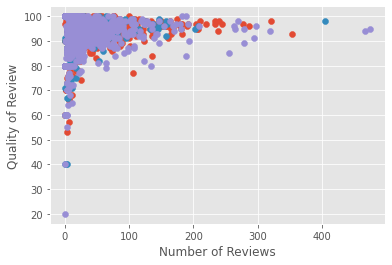

In [79]:
strict_df = strict_pol[strict_pol.cancellation_policy == 'strict']
moderate_df = strict_pol[strict_pol.cancellation_policy == 'moderate']
flexible_df = strict_pol[strict_pol.cancellation_policy == 'flexible']
x = strict_df['number_of_reviews']
y = strict_df['review_scores_rating']
w = moderate_df['number_of_reviews']
v = moderate_df['review_scores_rating']
u = flexible_df['number_of_reviews']
t = flexible_df['review_scores_rating']


plt.scatter(w, v)
plt.scatter(u, t)
plt.scatter(x, y)
plt.xlabel('Number of Reviews')
plt.ylabel('Quality of Review')
plt.show()

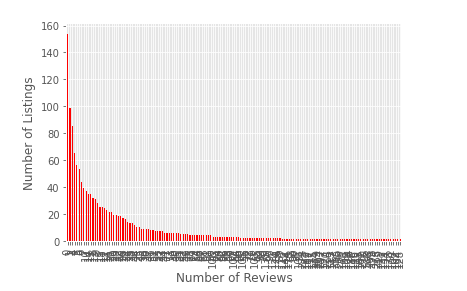

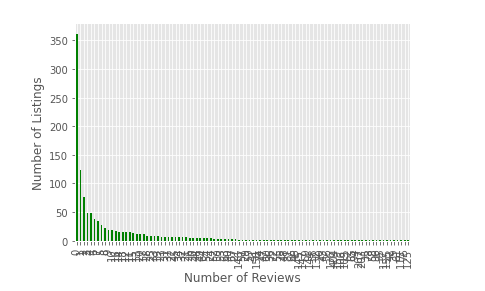

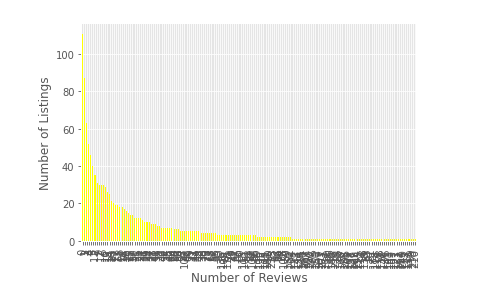

In [89]:
strict_no_reviews = strict_df.number_of_reviews.value_counts()
flexible_no_reviews = flexible_df.number_of_reviews.value_counts()
moderate_no_reviews = moderate_df.number_of_reviews.value_counts()

strict_no_reviews.plot(kind='bar',  color='red', label='Strict')
plt.title('Number of Reviews for Listings under Strict Cancellation Policy')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.show()


flexible_no_reviews.plot(kind='bar',  color='green', label='Flexible')
plt.title('Number of Reviews for Listings under Flexible Cancellation Policy')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.show()

moderate_no_reviews.plot(kind='bar', color='yellow', label='Moderate')
plt.title('Number of Reviews for Listings under Moderate Cancellation Policy')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.show()

#### Evaluate the Results

From the bar charts, it looks like listings with a flexible or moderate cancellation policy have a higher number of reviews than listings with a strict cancellation policy.However, we cannot say that listings with a strict cancellation policy have a lower number of reviews.

In [100]:
strict_df = strict_pol.dropna(subset=['cancellation_policy', 'review_scores_rating'])
strict_pol_dummies = pd.get_dummies(strict_pol, columns=['cancellation_policy'])
X = strict_pol_dummies[['review_scores_rating']]
y = strict_pol_dummies[['cancellation_policy_flexible', 'cancellation_policy_moderate', 'cancellation_policy_strict']]
linreg = LinearRegression()
linreg.fit(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R squared Score:', r2_score(y_test, y_pred))

Mean squared error: 0.21700660498645974
R squared Score: 0.00045310269230576977


The R-squared variance and mean squared error are all very low. This means that quality of reviews doesn't seem very correlated to cancellation policy.

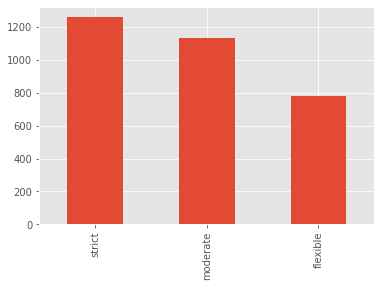

In [102]:
strict_pol.cancellation_policy.value_counts().plot.bar();


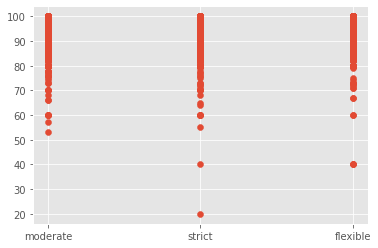

In [106]:
plt.scatter(strict_pol['cancellation_policy'], strict_pol['review_scores_rating']);